# Irysy - analiza gatunków
### O Danych
Zbiór danych zawiera informacje o trzech gatunkach irysów:

### O danych
Dane obejmują pomiary czterech cech: długość i szerokość działki kielicha oraz długość i szerokość płatka.

Każdy wiersz w zbiorze danych reprezentuje pojedynczy kwiat, a wartości pomiarów są podane w centymetrach.

Zbiór składa się z 150 próbek, po 50 dla każdego gatunku, i jest szeroko stosowany jako podstawowy zbiór danych do
testowania algorytmów klasyfikacji oraz w nauce o danych i uczeniu maszynowym.

Kolumny:
* **długość kielicha (sepal length)** - Długość kielicha w cm
* **szerokość kielicha (sepal width)** - Szerokość kielicha w cm
* **długość płatka (petal length)** - Długość płatka w cm
* **szerokość płatka (petal width)** - Szerokość płatka w cm
* **klasa (class)** - Klasa irysa (setosa, versicolor, virginica)

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Przegląd i analiza danych dotyczących Irysów

## Wczytanie danych

In [3]:
df = pd.read_csv('25__iris.csv', sep=",")
df.head(5)

,długość kielicha (sepal length),szerokość kielicha (sepal width),długość płatka (petal length),szerokość płatka (petal width),klasa (class)
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


## 1.1 Przegląd losowych danych

In [3]:
df.sample(5)

,długość kielicha (sepal length),szerokość kielicha (sepal width),długość płatka (petal length),szerokość płatka (petal width),klasa (class)
128,6.4,2.8,5.6,2.1,Iris-virginica
72,6.3,2.5,4.9,1.5,Iris-versicolor
65,6.7,3.1,4.4,1.4,Iris-versicolor
23,5.1,3.3,1.7,0.5,Iris-setosa
119,6.0,2.2,5.0,1.5,Iris-virginica


#### Na podstawie wyświetlonych wartości losowych widzimy, że mamy dane opisujące wielkości kielicha i płatków kwiatów z rodzaju Irys oraz rozróżnienie na ich gatunki. 

## 1.2 Sprawdzenie wartości unikatowych.

In [4]:
df.nunique()

długość kielicha (sepal length)     35
szerokość kielicha (sepal width)    23
długość płatka (petal length)       43
szerokość płatka (petal width)      22
klasa (class)                        3
dtype: int64

In [5]:
df['klasa (class)'].value_counts()

klasa (class)
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: count, dtype: int64

#### Mamy dane na temat 3 gatunków Irysa - Setosa, Versicolor oraz Virginica. Dla każdego gatunku podane jest 50 wartości zawierających informacje o długości i szerokości kielicha oraz długości i szerokości płatka.

In [4]:
# w póżniejszym kroku zmienione nazwy klumn, sztucznie dodane w tym miejscuz aby przywrócić pierwotne nazwy
df = df.rename(columns={
    'gatunek': 'klasa (class)',
    'długość kielicha': 'długość kielicha (sepal length)',
    'szerokość kielicha': 'szerokość kielicha (sepal width)',
    'długość płatka': 'długość płatka (petal length)',
    'szerokość płatka': 'szerokość płatka (petal width)'
    }) 

## 1.3 Przegląd danych statystycznych

In [17]:
dane_stat = df.groupby('klasa (class)').agg({
    'długość kielicha (sepal length)': ['min','mean','median','max','std'],
    'szerokość kielicha (sepal width)': ['min','mean','median','max','std'],
})
dane_stat

długość kielicha (sepal length)                               \
                                            min   mean median  max       std   
klasa (class)                                                                  
Iris-setosa                                 4.3  5.006    5.0  5.8  0.352490   
Iris-versicolor                             4.9  5.936    5.9  7.0  0.516171   
Iris-virginica                              4.9  6.588    6.5  7.9  0.635880   

                szerokość kielicha (sepal width)                               
                                             min   mean median  max       std  
klasa (class)                                                                  
Iris-setosa                                  2.3  3.418    3.4  4.4  0.381024  
Iris-versicolor                              2.0  2.770    2.8  3.4  0.313798  
Iris-virginica                               2.2  2.974    3.0  3.8  0.322497

In [19]:
dane_stat = df.groupby('klasa (class)').agg({
    'długość płatka (petal length)': ['min','mean','median','max','std'],
    'szerokość płatka (petal width)': ['min','mean','median','max','std'],
})
dane_stat

długość płatka (petal length)                               \
                                          min   mean median  max       std   
klasa (class)                                                                
Iris-setosa                               1.0  1.464   1.50  1.9  0.173511   
Iris-versicolor                           3.0  4.260   4.35  5.1  0.469911   
Iris-virginica                            4.5  5.552   5.55  6.9  0.551895   

                szerokość płatka (petal width)                               
                                           min   mean median  max       std  
klasa (class)                                                                
Iris-setosa                                0.1  0.244    0.2  0.6  0.107210  
Iris-versicolor                            1.0  1.326    1.3  1.8  0.197753  
Iris-virginica                             1.4  2.026    2.0  2.5  0.274650

## 1.4 Zmiana nazw kolumn

#### Zmieniam nazwy kolumn, na polskie aby lepiej się pracowało nad analizą oraz zwiększyć przejrzystość

In [5]:
df = df.rename(columns={
    'klasa (class)': 'gatunek',
    'długość kielicha (sepal length)': 'długość kielicha',
    'szerokość kielicha (sepal width)': 'szerokość kielicha',
    'długość płatka (petal length)': 'długość płatka',
    'szerokość płatka (petal width)': 'szerokość płatka'
    }) 

# 2. Sprawdzenie kompletności danych

In [9]:

df.isnull().sum()

długość kielicha      0
szerokość kielicha    0
długość płatka        0
szerokość płatka      0
gatunek               0
dtype: int64

#### Posiadamy kompletne dane dla wszystkich przedstawionych gatunków kwiatów - brak pustych wartości.

# 3. Analiza danych poszczególnych danych

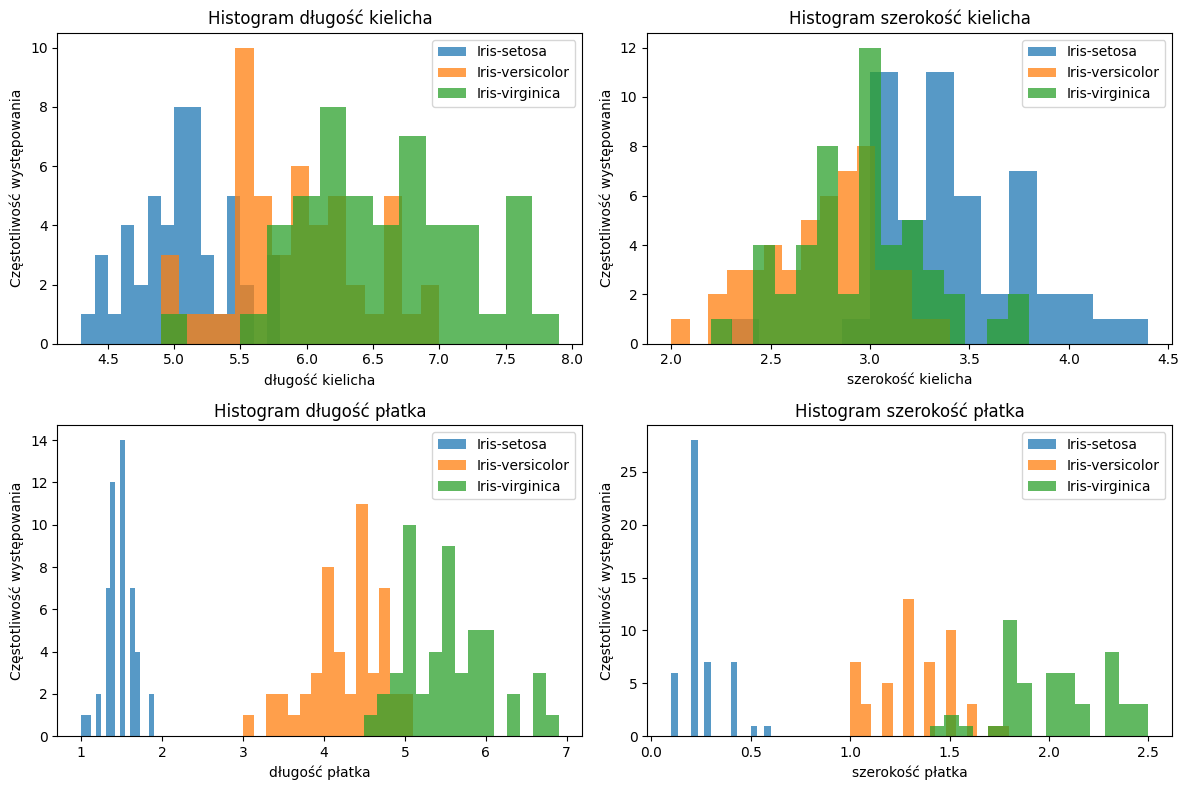

In [7]:
classes = df['gatunek'].unique()
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 8))
axes = axes.flatten()

for i, column in enumerate(df.columns[:-1]):  
    for cls in classes:
        subset = df[df['gatunek'] == cls]
        axes[i].hist(subset[column], bins=15, alpha=0.75, label=cls)
    axes[i].set_title(f'Histogram {column}')
    axes[i].set_xlabel(column)
    axes[i].set_ylabel('Częstotliwość występowania')
    axes[i].legend()

plt.tight_layout()
plt.savefig("class_histograms.png")

#### Na podstawie histogramu możemy zauważyć, że gatunek Iris-versicolor oraz Iris-virginica mają zbliżoną budowę kielicha, jednak w przypadku Iris-versicolor wiecęj obserwacji wykazuje mniejszą długość kielicha, natomiast Iris-virginica cechuje większa rozpiętość w długości kielicha. Gatunek Iris-setosa posiada znacznie krótszy, ale szerszy kielich od pozostałych dwóch gatunków. 
#### Obserwacje długości i szerokości płatka wykazują, że gatunek Iris-virginica posiada najkrótsze i najwęższe płatki, Iris-setosa najdłuższe i najszersze płatki, natomiast Iris-versicolor pod względem budowy płatków znajduje sie pomiedzy dwoma powyższymi gatunkami.

# 4. Naprawa brakujązych wartości

 #### W tym przypadku mamy kompletne dane, więc pomijamy ten krok.

# 5. Analiza relacji między zmiennymi.

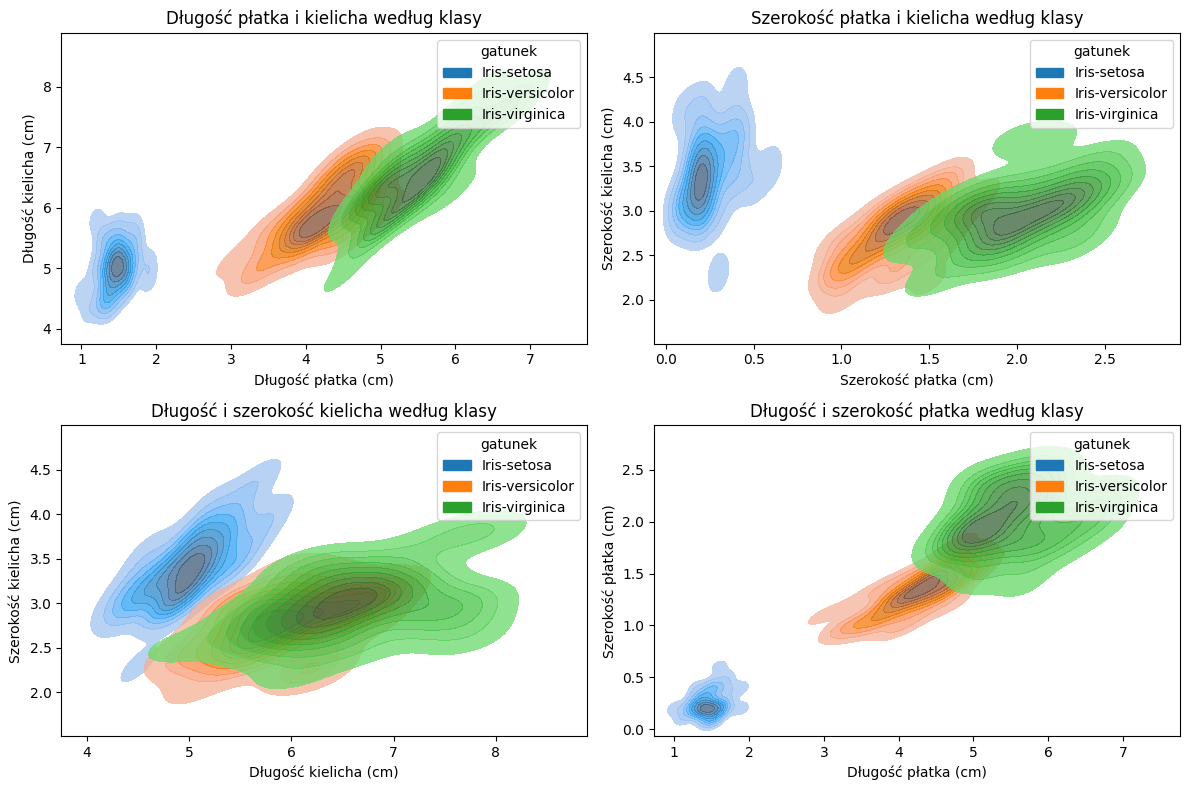

In [8]:
# Set up the matplotlib figure
fig, axes = plt.subplots(2, 2, figsize=(12, 8))

sns.kdeplot(data=df, x='długość płatka', y='długość kielicha', hue='gatunek', fill=True, common_norm=False, alpha=0.75, ax=axes[0, 0])
axes[0, 0].set_title('Długość płatka i kielicha według klasy')
axes[0, 0].set_xlabel('Długość płatka (cm)')
axes[0, 0].set_ylabel('Długość kielicha (cm)')

sns.kdeplot(data=df, x='szerokość płatka', y='szerokość kielicha', hue='gatunek', fill=True, common_norm=False, alpha=0.75, ax=axes[0, 1])
axes[0, 1].set_title('Szerokość płatka i kielicha według klasy')
axes[0, 1].set_xlabel('Szerokość płatka (cm)')
axes[0, 1].set_ylabel('Szerokość kielicha (cm)')

sns.kdeplot(data=df, x='długość kielicha', y='szerokość kielicha', hue='gatunek', fill=True, common_norm=False, alpha=0.75, ax=axes[1, 0])
axes[1, 0].set_title('Długość i szerokość kielicha według klasy')
axes[1, 0].set_xlabel('Długość kielicha (cm)')
axes[1, 0].set_ylabel('Szerokość kielicha (cm)')

sns.kdeplot(data=df, x='długość płatka', y='szerokość płatka', hue='gatunek', fill=True, common_norm=False, alpha=0.75, ax=axes[1, 1])
axes[1, 1].set_title('Długość i szerokość płatka według klasy')
axes[1, 1].set_xlabel('Długość płatka (cm)')
axes[1, 1].set_ylabel('Szerokość płatka (cm)')

plt.tight_layout()

plt.savefig("kde_plots.png")

#### Na podstawie powyższych wykresów można stwierdzić, że dla gatunków Iris-versicolor i Iris-virginica zachodzą relacje pomiędzy długościami i szerokościami zarówno płatka jak i kielicha, są to zależności rosnące - im szerszy, tym dłuższy. 
#### Iris-setosa wykazuje niewielką zależność długości od szerokości.

# 6. Wartości odstające.

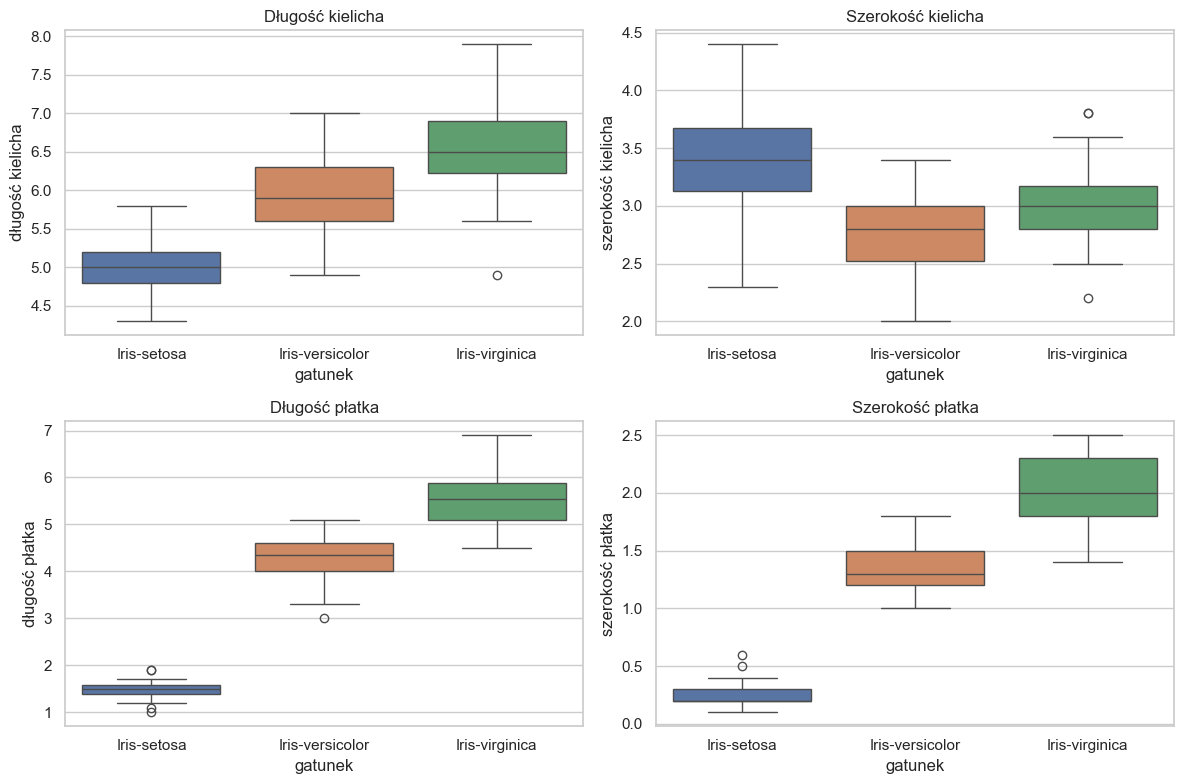

In [9]:
sns.set(style="whitegrid")

fig, axes = plt.subplots(2, 2, figsize=(12, 8))

sns.boxplot(x='gatunek', y='długość kielicha', data=df, hue='gatunek', ax=axes[0, 0])
axes[0, 0].set_title('Długość kielicha')

sns.boxplot(x='gatunek', y='szerokość kielicha', data=df, hue='gatunek',ax=axes[0, 1])
axes[0, 1].set_title('Szerokość kielicha')

sns.boxplot(x='gatunek', y='długość płatka', data=df, hue='gatunek',ax=axes[1, 0])
axes[1, 0].set_title('Długość płatka')

sns.boxplot(x='gatunek', y='szerokość płatka', data=df, hue='gatunek',ax=axes[1, 1])
axes[1, 1].set_title('Szerokość płatka')

plt.tight_layout()

plt.savefig("boxplot_iris.png")

#### Występuję niewielka ilość danych odstających, która nie powinna wpłynąć znacząco na ogólne wykorzystanie danych.

### Podsumowanie

* Dla każdego kwiatu zmierzono cztery cechy: długość i szerokość kielicha oraz długość i szerokość płatka (wszystko w centymetrach).
* Dane są kompletne – nie występują żadne brakujące wartości.
* Analiza statystyczna i wizualizacje (histogramy) pokazują, że poszczególne gatunki różnią się budową kielicha i płatków:
* * Iris-setosa ma krótszy, ale szerszy kielich w porównaniu do pozostałych gatunków.
* * Iris-virginica cechuje się większą rozpiętością długości kielicha.
* * Iris-versicolor pod względem budowy płatków i kielicha plasuje się pomiędzy pozostałymi gatunkami.
* Występują niewielkie ilości wartości odstających, które nie mają istotnego wpływu na całość danych.
* Między niektórymi cechami (np. długość i szerokość płatka/kielicha) występują zależności – szczególnie dla gatunków versicolor i virginica.
##### Podsumowując, zebrane dane są kompletne i dobrze opisują różnice między gatunkami irysów, co czyni je użytecznymi do testowania algorytmów klasyfikacyjnych oraz nauki o danych.
